In [32]:
import numpy as np
import matplotlib.pyplot as plt
img = np.array(open("train_images/10728036/142859125/1.dcm", "rb").read())

print(img.shape)

()


In [29]:
import pandas as pd

df_coord = pd.read_csv("train_label_coordinates.csv")
df_desc = pd.read_csv("train_series_descriptions.csv")
df_train = pd.read_csv("train.csv")
df_coord.info()
df_desc.info()
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48692 entries, 0 to 48691
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   study_id         48692 non-null  int64  
 1   series_id        48692 non-null  int64  
 2   instance_number  48692 non-null  int64  
 3   condition        48692 non-null  object 
 4   level            48692 non-null  object 
 5   x                48692 non-null  float64
 6   y                48692 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6294 entries, 0 to 6293
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   study_id            6294 non-null   int64 
 1   series_id           6294 non-null   int64 
 2   series_description  6294 non-null   object
dtypes: int64(2), object(1)
memory usage: 147.6+ KB
<class 'pandas.cor

In [38]:
# tf is going on here ? 
coords = df_coord["instance_number"].unique()
coords.sort()
coords

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   69,   70,   72,   73,
         74,   76,   78,   80,   82,   83,   84,   85,   91,   94,   95,
         96,   98,   99,  100,  102,  103,  106,  108,  109,  110,  115,
        117,  118,  119,  121,  123,  124,  126,  132,  133,  134, 5031,
       5039, 5046])

In [39]:
df_desc["series_description"].unique()

array(['Sagittal T2/STIR', 'Sagittal T1', 'Axial T2'], dtype=object)

(512, 512)


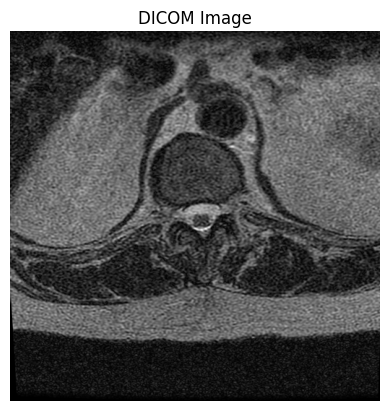

In [40]:
import pydicom

import matplotlib.pyplot as plt

img = "train_images/10728036/142859125/2.dcm"

study_id, series_id = img.split("/")[1:3]


# Read the DICOM file
dcm_file = pydicom.dcmread(img)

# Extract the image data
img_data = dcm_file.pixel_array
entry = df_coord[(df_coord["study_id"] == int(study_id)) & (df_coord["series_id"] == int(series_id))]

print(img_data.shape)

# Display the image using matplotlib
plt.imshow(img_data, cmap=plt.cm.gray)
plt.title("DICOM Image")
plt.axis('off')
plt.show()

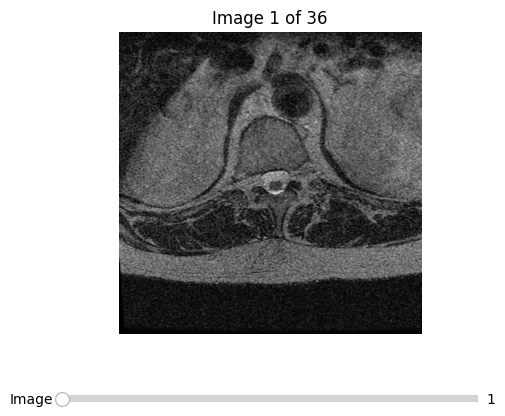

In [26]:
from matplotlib.widgets import Slider
import os
import pydicom

import matplotlib.pyplot as plt

# Function to load DICOM images into a list
def load_dicom_stack(folder_path):
  
  dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
  dicom_files.sort()  # Ensure the files are sorted correctly
  dicom_stack = [pydicom.dcmread(f).pixel_array for f in dicom_files]
  return dicom_stack

# Load the DICOM stack
folder_path = "train_images/10728036/142859125"
dicom_stack = load_dicom_stack(folder_path)

# Create a figure and axis
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

# Display the first image
img_display = ax.imshow(dicom_stack[0], cmap=plt.cm.gray)
ax.set_title(f"Image 1 of {len(dicom_stack)}")
ax.axis('off')

# Create a slider axis and slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Image', 1, len(dicom_stack), valinit=1, valstep=1)

# Update function for the slider
def update(val):
  img_index = int(slider.val) - 1
  img_display.set_data(dicom_stack[img_index])
  ax.set_title(f"Image {img_index + 1} of {len(dicom_stack)}")
  fig.canvas.draw_idle()

# Attach the update function to the slider
slider.on_changed(update)

plt.show()